In [64]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('data')

In [65]:
import cv2

In [66]:
from tqdm import tqdm

from keras.utils.np_utils import to_categorical

In [67]:
print (dataset_path)

['art', 'beauty', 'Chatting', 'cooking', 'education', 'gaming', 'music', 'news', 'others', 'sports']


In [68]:
dir = 'data' 
# Features and Labels
ft = []
lb = []
labels = {}
determine_label = ['art', 'beauty', 'Chatting', 'cooking', 'education', 'gaming', 'music', 'news', 'others', 'sports']
r=0
# Extracting label string and index
for i, k in enumerate(os.listdir(dir)) :
    if k in determine_label:
        labels[k] = r
        r+=1
# Appending features and labels
for i in determine_label:
    subdir = os.path.join(dir, i)
    for j in tqdm(os.listdir(subdir)):
        im =cv2.imread(os.path.join(subdir, j), 0) 
        im =cv2.resize(im,(70,70))
        ft.append(im)
        lb.append(labels[i])

100%|██████████| 402/402 [00:19<00:00, 21.06it/s]


In [69]:

ft = np.array(ft)
lb = np.array(lb).reshape(len(ft),1)
ft.shape, lb.shape

((7090, 70, 70), (7090, 1))

In [70]:
X = ft.reshape(-1,70,70,1)
X.shape

(7090, 70, 70, 1)

In [71]:
Y= to_categorical(lb)
Y.shape

(7090, 10)

In [72]:
X =X/255.0
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5317, 70, 70, 1), (1773, 70, 70, 1), (5317, 10), (1773, 10))

In [73]:
x_train.shape[1:]

(70, 70, 1)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [75]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(1024, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 70, 70, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 35, 35, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 17, 17, 64)       

In [76]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
from keras.callbacks import EarlyStopping
early_stopping_monitor=EarlyStopping(patience=5)
hist = model.fit(x_train,y_train, epochs=20,callbacks=[early_stopping_monitor],validation_data=(x_test,y_test))


Epoch 1/20
167/167 [==============================] - 158s 926ms/step - loss: 1.8634 - accuracy: 0.2913 - val_loss: 1.7599 - val_accuracy: 0.3102
Epoch 2/20
167/167 [==============================] - 154s 923ms/step - loss: 1.6767 - accuracy: 0.3412 - val_loss: 1.5932 - val_accuracy: 0.3683
Epoch 3/20
167/167 [==============================] - 161s 964ms/step - loss: 1.4594 - accuracy: 0.4489 - val_loss: 1.4789 - val_accuracy: 0.4332
Epoch 4/20
167/167 [==============================] - 156s 932ms/step - loss: 1.3016 - accuracy: 0.5426 - val_loss: 1.2023 - val_accuracy: 0.5572
Epoch 5/20
167/167 [==============================] - 158s 948ms/step - loss: 1.1376 - accuracy: 0.6013 - val_loss: 1.1537 - val_accuracy: 0.5950
Epoch 6/20
167/167 [==============================] - 155s 929ms/step - loss: 1.0259 - accuracy: 0.6494 - val_loss: 0.9984 - val_accuracy: 0.6599
Epoch 7/20
167/167 [==============================] - 157s 939ms/step - loss: 0.9344 - accuracy: 0.6822 - val_loss: 0.9670 -

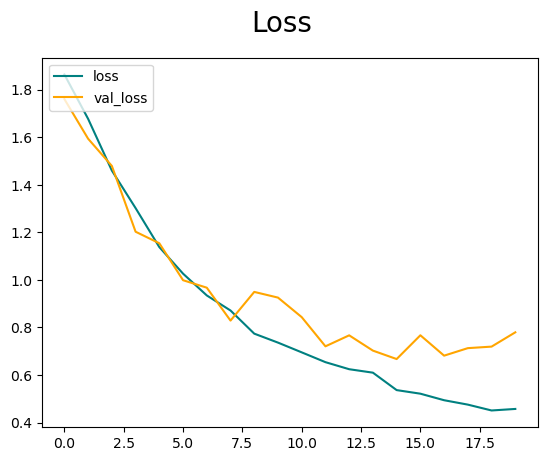

In [93]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

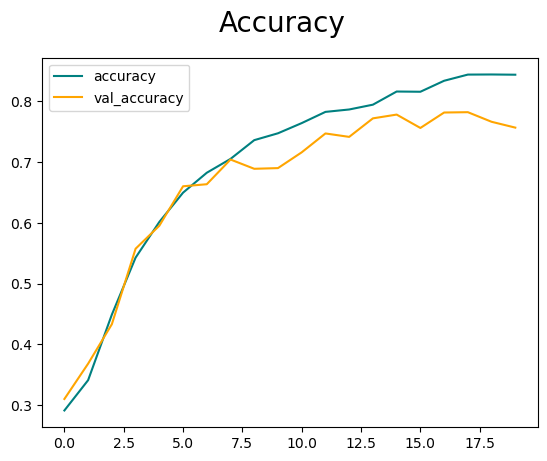

In [94]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [78]:
preds = model.evaluate(x_test,y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

56/56 [==============================] - 6s 114ms/step - loss: 0.7793 - accuracy: 0.7563
Loss = 0.7793448567390442
Test Accuracy = 0.7563451528549194


In [79]:
rev_labels = []
for i,k in enumerate(labels.keys()):
    rev_labels.append(k)
rev_labels

['art',
 'beauty',
 'Chatting',
 'cooking',
 'education',
 'gaming',
 'music',
 'news',
 'others',
 'sports']

Image number :  1040
1/1 [==============================] - 0s 262ms/step
cooking


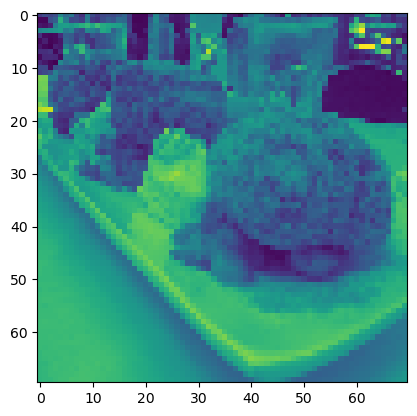

Image number :  231
1/1 [==============================] - 0s 73ms/step
beauty


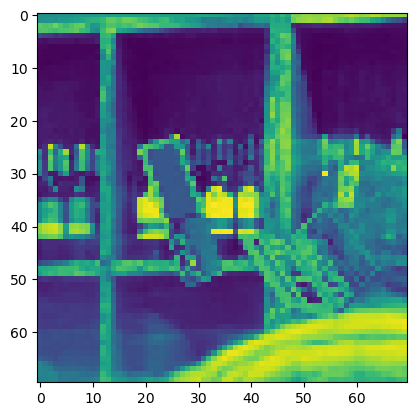

Image number :  430
1/1 [==============================] - 0s 80ms/step
cooking


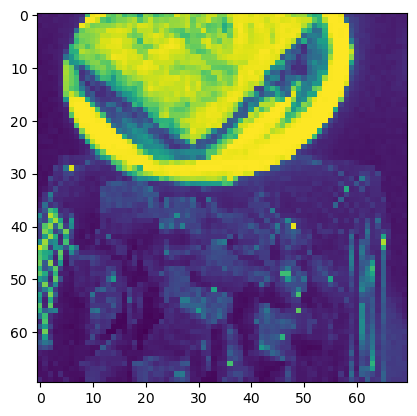

Image number :  1095
1/1 [==============================] - 0s 75ms/step
gaming


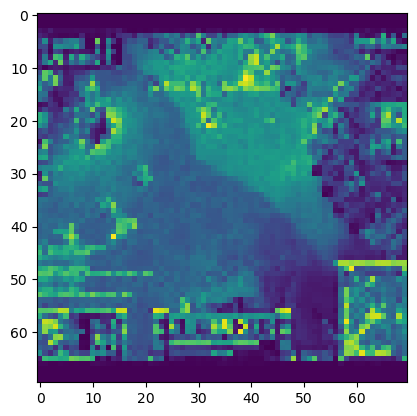

Image number :  712
1/1 [==============================] - 0s 65ms/step
cooking


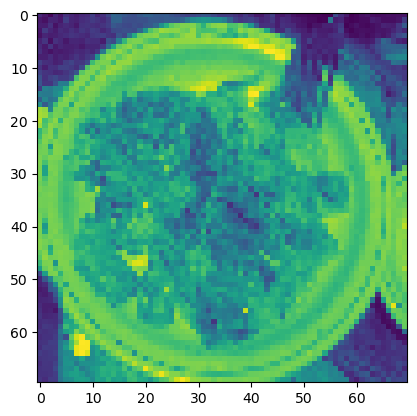

Image number :  1149
1/1 [==============================] - 0s 73ms/step
beauty


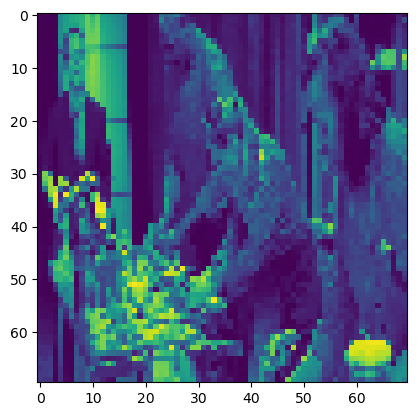

Image number :  842
1/1 [==============================] - 0s 65ms/step
art


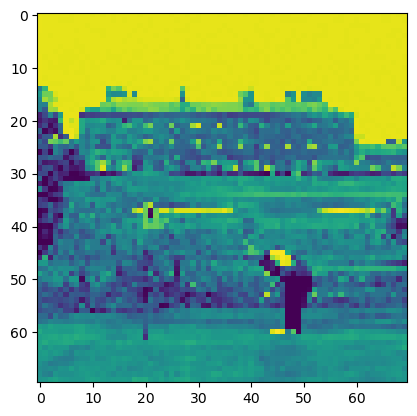

Image number :  267
1/1 [==============================] - 0s 82ms/step
gaming


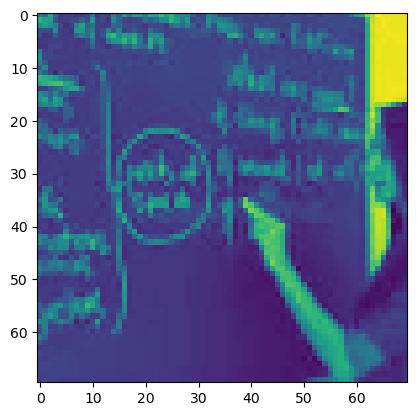

Image number :  1559
1/1 [==============================] - 0s 74ms/step
cooking


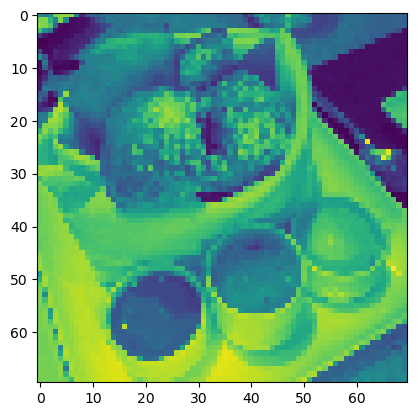

Image number :  930
1/1 [==============================] - 0s 80ms/step
education


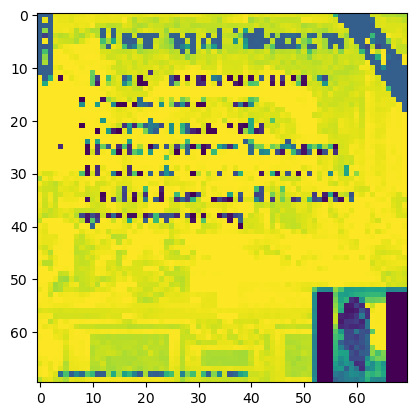

In [80]:
import random 
def predict(i):
    pre_img = i
    print('Image number : ',pre_img)
    
    print(rev_labels[np.argmax(model.predict([x_test[pre_img :pre_img+1]]))])
    plt.imshow(x_test[pre_img:pre_img+1].reshape(70,70))
    plt.show()
for i in range(10):
    predict(i+random.randint(0,x_test.shape[0]))
    

(1, 70, 70, 1)

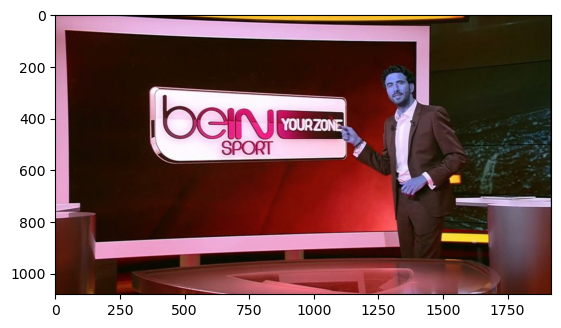

In [88]:
img = cv2.imread('x1080.jpg')
plt.imshow(img)
img =cv2.resize(img, (70, 70))
img= np.array(img)
img = np.mean(img, axis=-1, keepdims=True)
img=img.reshape(-1,70,70,1)
img=img/255.0
img.shape

In [89]:
pred = model.predict(img)

1/1 [==============================] - 0s 72ms/step


In [90]:
rev_labels[np.argmax(pred)]
predictions_percentages = np.round(pred*100, decimals=2)

# Print the percentage of predictions for each class
for i, label in enumerate(rev_labels):
    print('{}: {:.2f}%'.format(label, pred[0][i]))

art: 0.21%
beauty: 0.00%
Chatting: 0.00%
cooking: 0.03%
education: 0.00%
gaming: 0.17%
music: 0.04%
news: 0.51%
others: 0.00%
sports: 0.03%


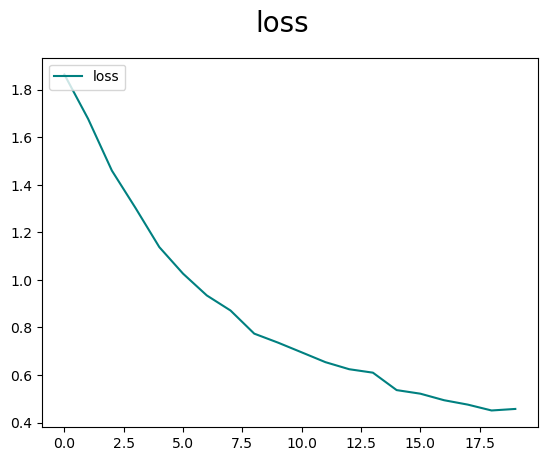

In [95]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')


fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

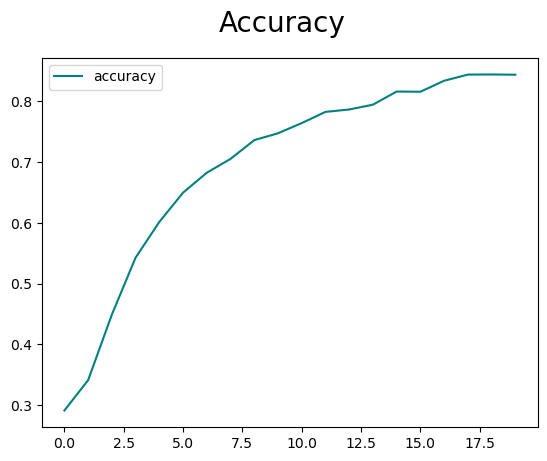

In [96]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [91]:
from tensorflow.keras.models import load_model

In [92]:
model.save(os.path.join('model.h5'))

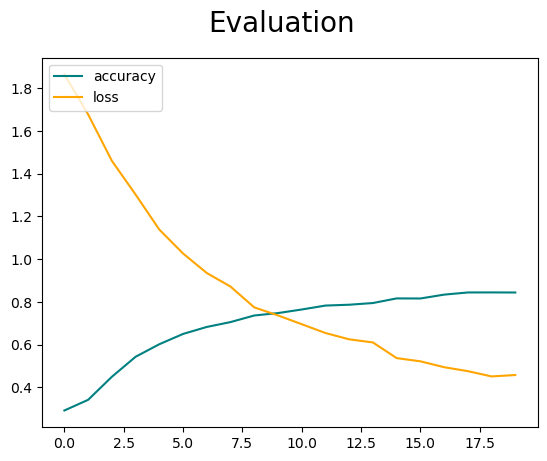

In [97]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['loss'], color='orange', label='loss')
fig.suptitle('Evaluation', fontsize=20)
plt.legend(loc="upper left")
plt.show()